In [1]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

# 全局变量定义

In [128]:
L = 2 # layers
M = 1 # inputs
N = 1 # output
MD = 91 # data
nl = [M, 1, N] # number of neurons in each layer
alpha = 0.000075 # learning rate
ROUND = 500 # training rounds
n_parameter = 0
for l in range(len(nl)-1):
    n_parameter += (nl[l]+1) * nl[l+1]

READ_WEIGHT = True

# choices of activation functions
activation_dict = {"0": Cons, "1": ReLU, "2": sigmoid, "3": log, "4": exp}
reactivation_dict = {"0": rCons, "1": rReLU, "2": rsigmoid, "3": rlog, "4": rexp}
activations = [0, 3, 4] # activation functions in each layer
reactivations = activations.copy()
# relate activation functions to layers
for i, a in enumerate(activations):
    activations[i] = activation_dict[str(a)]
for i, a in enumerate(reactivations):
    reactivations[i] = reactivation_dict[str(a)]

# 主函数

In [26]:
def main():
    # addresses
    #address_x = "E:\\炼金法师团__复旦\\物理模型\\匀加速直线input.txt"
    #address_y = "E:\\炼金法师团__复旦\\物理模型\\匀加速直线train.txt"
    address_x = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_input.txt"
    address_y = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_train.txt"
    address_loss = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_loss.txt"
    address_Log = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_Log.txt"
    address_weight = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_weight.txt"
    f_loss = open(address_loss, 'w+', encoding='utf-8')
    f_Log = open(address_Log, 'w+', encoding='utf-8')
    
    gen_data(address_x, address_y)
    # bound of random W initialization
    lower = -1
    upper = 1
    
    # initialize neural network structure
    x0, y0, x, y, s, W, ds, dy, dW = init()
    
    W = [[], np.array([[1.,0.],[-0.51485757,0.80383279]]), np.array([[1.,0.],[0.00616596, 2.14594328]])]
    # read in data of x0, y0, and weights, or randomly generate weights
    read(x0, y0, W, address_x, address_y, address_weight, lower, upper)
    
    # normalization
    # x0 = norm(x0)
    # y0 = norm(y0)
    
    for i in range(1, ROUND+1):
        forward_prop(x0, W, x, s, y)
        
        f_Log.write(f"W\n{W[1:]}\n\n")
        f_Log.write("x0\n{}\n\nx\n{}\n\ns\n{}\n\ny\n{}\n\ny0\n{}\n\n".format(x0, x[1:], s[1:], y[1:], y0))
        f_loss.write(str(round(Loss(y[L], y0)[0],4))+'\n')
        
        back_prop(y0, x, y, W, dy, ds, dW)
        
        f_Log.write("dy\n{}\n\nds\n{}\n\ndW\n{}\n\n".format(dy[1:], ds[1:], dW[1:]))
        
        update(W, dW)
    
    f_Log.write(f"W\n{W[1:]}\n\n")
    
    # save parameters
    f_weight = open(address_weight, 'w+', encoding='utf-8')
    for l in W[1:]:
        for j in l[1:]:
            for i in j:
                f_weight.write(str(i))
                f_weight.write(" ")
            f_weight.write('\n')
        f_weight.write('\n')
    
    f_loss.close()
    f_Log.close()
    f_weight.close()
    return x0, y0, x, y, s, W, ds, dy, dW

In [130]:
x0, y0, x, y, s, W, ds, dy, dW = main()

['-0.6330671853409149 0.8300480613587937', '-0.007221967954515587 2.138163569945808']


0.0424


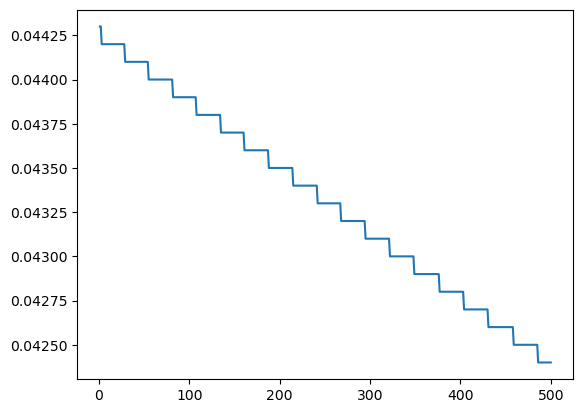

In [131]:
# plot the change of loss
#address_L = "E:\\炼金法师团__复旦\\物理模型\\匀加速直线loss.txt"
address_loss = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_loss.txt"
f_loss = open(address_loss, 'r', encoding='utf-8')

data = f_loss.read()
data = data.split('\n')[:-1]
rounds = np.arange(1, ROUND+1)
data = np.array(data, dtype=float)

print(data[-1])
plt.plot(rounds, data)
plt.show()

f_loss.close()



0.0428


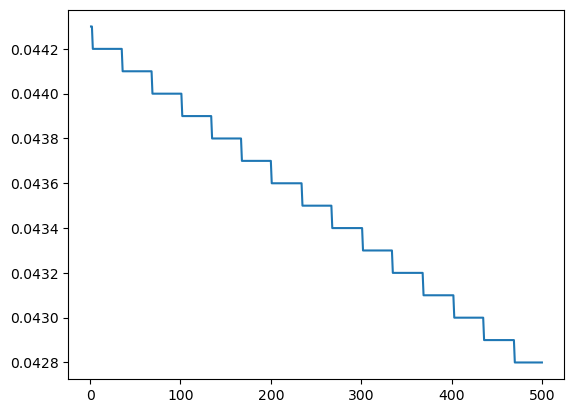

In [127]:
# plot the change of loss
#address_L = "E:\\炼金法师团__复旦\\物理模型\\匀加速直线loss.txt"
address_loss = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_loss.txt"
f_loss = open(address_loss, 'r', encoding='utf-8')

data = f_loss.read()
data = data.split('\n')[:-1]
rounds = np.arange(1, ROUND+1)
data = np.array(data, dtype=float)

print(data[-1])
plt.plot(rounds, data)
plt.show()

f_loss.close()



0.0438


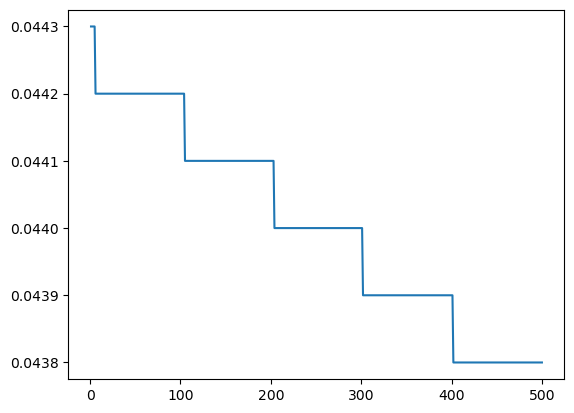

In [117]:
# plot the change of loss
#address_L = "E:\\炼金法师团__复旦\\物理模型\\匀加速直线loss.txt"
address_loss = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_loss.txt"
f_loss = open(address_loss, 'r', encoding='utf-8')

data = f_loss.read()
data = data.split('\n')[:-1]
rounds = np.arange(1, ROUND+1)
data = np.array(data, dtype=float)

print(data[-1])
plt.plot(rounds, data)
plt.show()

f_loss.close()



[  1.4569   1.6816   1.9236   2.183    2.4598   2.7544   3.0667   3.3969
   3.7451   4.1115   4.4962   4.8992   5.3207   5.7607   6.2194   6.6968
   7.193    7.7082   8.2424   8.7957   9.3681   9.9598  10.5708  11.2012
  11.8511  12.5205  13.2095  13.9182  14.6466  15.3949  16.163   16.9511
  17.7591  18.5873  19.4355  20.3039  21.1925  22.1014  23.0307  23.9803
  24.9504  25.941   26.9522  27.984   29.0364  30.1095  31.2033  32.318
  33.4535  34.6099  35.7872  36.9855  38.2049  39.4453  40.7068  41.9895
  43.2934  44.6185  45.9649  47.3327  48.7218  50.1323  51.5642  53.0177
  54.4926  55.9891  57.5072  59.0469  60.6084  62.1915  63.7963  65.423
  67.0714  68.7417  70.4339  72.148   73.884   75.6421  77.4221  79.2243
  81.0485  82.8948  84.7632  86.6539  88.5667  90.5018  92.4592  94.4389
  96.4409  98.4653 100.5121]


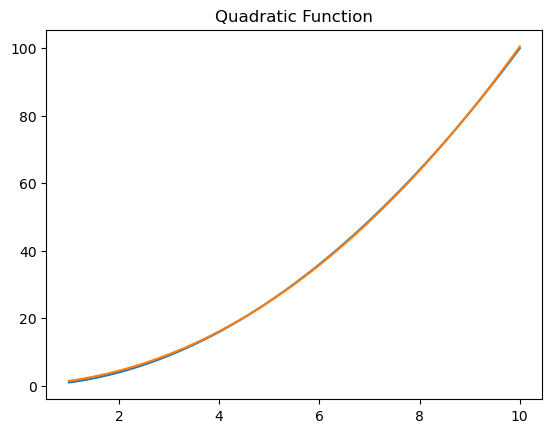

In [123]:
# plot the predicted and the actual function
address_x = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_input.txt"
address_y = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_train.txt"
f1 = open(address_x, 'r+', encoding='utf-8')
f2 = open(address_y, 'r+', encoding='utf-8')

data_x = f1.read()
data_y = f2.read()
data_x = data_x.split('\n')
data_y = data_y.split('\n')
data_x = np.array(data_x, dtype="float").reshape(1, MD)
data_y = np.array(data_y, dtype="float").reshape(1, MD)
for i, x_val in enumerate(data_x[0]):
    data_x[0][i] = round(x_val,2)
for i, y_val in enumerate(data_y[0]):
    data_y[0][i] = round(y_val,4)

# data_y = np.array([np.ones((MD)), data_y[0]])
# data_y = norm(data_y)[1]
data_y = data_y[0]

y_hat = y[-1][1].reshape(1, MD)
for i, y_val in enumerate(y_hat[0]):
    y_hat[0][i] = round(y_val,4)


# print(data_x[0])
# print(data_y)
print(y_hat[0])


plt.plot(data_x[0], data_y)
plt.plot(data_x[0], y_hat[0])
plt.title("Quadratic Function")
plt.show()

f1.close()
f2.close()

In [129]:
# roll back to the last-time parameters
address_weight = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_weight.txt"
address_sweight = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\stored_weight.txt"
fw = open(address_weight, 'w+', encoding='utf-8')
fsw = open(address_sweight, 'r', encoding='utf-8')

data = fsw.read()
print(data)
fw.write(data)

fw.close()
fsw.close()

-0.6330671853409149 0.8300480613587937

-0.007221967954515587 2.138163569945808


In [108]:
# update the stored_weight
# don't do it unless you are sure
address_weight = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\log_test_weight.txt"
address_sweight = "E:\\炼金法师团__复旦\\人梯工程\\神经网络\\Log激活函数\\stored_weight.txt"
fw = open(address_weight, 'r', encoding='utf-8')
fsw = open(address_sweight, 'w+', encoding='utf-8')

data = fw.read()[:-2]
fsw.write(data)

fw.close()
fsw.close()

In [54]:
W

[[],
 array([[ 1.        ,  0.        ],
        [-0.51485757,  0.80383279]]),
 array([[1.        , 0.        ],
        [0.00616596, 2.14594328]])]

In [30]:
a = ['1.0', '1.1', '1.2']
for i in range(3):
    a[i] = a[i].split(' ')
print(a)

[['1.0'], ['1.1'], ['1.2']]


# 初始化

In [2]:
def init():
    ones = np.ones((1,MD))
    x0 = np.zeros((M+1, MD))
    x0[0] = ones.copy()
    
    y0 = np.zeros((N+1, MD))
    y0[0] = ones.copy()
    
    x = [[]]
    for l in range(1, L+1):
        x.append(np.zeros((nl[l-1]+1, MD)))
        x[l][0] = ones.copy()
    
    y = [[]]
    for l in range(1, L+1):
        y.append(np.zeros((nl[l]+1, MD)))
        y[l][0] = ones.copy()
    
    s = y.copy()
    
    W = [[]]
    for l in range(1, L+1):
        W.append(np.zeros((nl[l]+1, nl[l-1]+1)))
        W[l][0][0] = 1.0
    
    ds = [[]]
    for l in range(1, L+1):
        ds.append(np.zeros((nl[l]+1, MD)))
    
    dy = ds.copy()
    
    dW = [[]]
    for l in range(1, L+1):
        dW.append(np.zeros((nl[l]+1, nl[l-1]+1)))
    
    return x0, y0, x, y, s, W, ds, dy, dW
    

# 生成数据

In [3]:
def gen_data(address_x, address_y):
    f1 = open(address_x, 'w+', encoding='utf-8')
    f2 = open(address_y, 'w+', encoding='utf-8')
    
    x = np.linspace(1, 10, MD)
    y = x**2
    
    
    for i in range(MD-1):
        f1.write(str(round(x[i],2))+'\n')
        f2.write(str(round(y[i],2))+'\n')
    f1.write(str(round(x[MD-1],2)))
    f2.write(str(round(y[MD-1],2)))
    
    
    f1.close()
    f2.close()

# 读入数据

In [63]:
def read(x0, y0, W, address_x, address_y, address_weight, lower, upper):
    f1 = open(address_x, 'r', encoding='utf-8')
    f2 = open(address_y, 'r', encoding='utf-8')
    fw = open(address_weight, 'r', encoding='utf-8')
    
    data_x0 = f1.read()
    data_y0 = f2.read()
    data_weight = fw.read()
    
    
    data_weight = data_weight.split('\n')
    data_x0 = data_x0.split('\n')
    data_y0 = data_y0.split('\n')
    for i in range(L-1):
        data_weight.remove('')
    for j in range(MD):
        data_x0[j] = data_x0[j].split(' ')
        data_y0[j] = data_y0[j].split(' ')
    print(data_weight)
    for l in range(L):
        data_weight[l] = data_weight[l].split(' ')
    data_x0 = np.array(data_x0, dtype="float").reshape(1, MD*M)[0]
    data_y0 = np.array(data_y0, dtype="float").reshape(1, MD*M)[0]
    data_weight = np.array(data_weight, dtype="float").reshape(1, n_parameter)[0]
    
    cnt_x = 0
    cnt_y = 0
    for md in range(MD):
        for j in range(1, M+1):
            x0[j][md] = data_x0[cnt_x]
            cnt_x += 1
        for j in range(1, N+1):
            y0[j][md] = data_y0[cnt_y]
            cnt_y += 1
    
    cnt = 0
    if READ_WEIGHT:
        for l in range(1, L+1):
            for j in range(1, nl[l]+1):
                for i in range(nl[l-1]+1):
                    W[l][j][i] = data_weight[cnt]
                    cnt += 1
    else:
        for l in range(1, L+1):
            for j in range(1, nl[l]+1):
                for i in range(nl[l-1]+1):
                    W[l][j][i] = rd.uniform(lower, upper)
    
    f1.close()
    f2.close()
    fw.close()

# 归一化

In [5]:
def norm(arr):
    row_sum = arr.sum(axis=1, keepdims=True) / MD
    sigma = (arr - row_sum)**2
    sigma = sigma.sum(axis=1, keepdims=True) / MD
    for i, s in enumerate(sigma):
        sigma[i] = math.sqrt(s)
    if sigma[1] == 0:
        return np.ones(shape=(arr.shape))
    arr2 = (arr - row_sum) / sigma
    ones = np.ones((1,MD))
    arr2[0] = ones.copy()
    return arr2

# 正向传播函数

In [6]:
def forward_prop(x0, W, x, s, y):
    for l in range(1, L+1):
        if l == 1:
            x[l] = x0
        else:
            x[l] = y[l-1]
        s[l] = np.dot(W[l], x[l])
        y[l] = activations[l](s[l])




# 反向传播函数

In [7]:
def back_prop(y0, x, y, W, dy, ds, dW):
    for l in range(L,0, -1):
        # print(l)
        if l == L:
            dy[l] = y[L] - y0
            dg = reactivations[l](y[l])
            ds[l] = dg * dy[l]
        else:
            dy[l][0] = np.zeros((1, MD))
            dg = reactivations[l](y[l])
            ds[l] = dg * dy[l]
        
        dW[l] = np.dot(ds[l], x[l].T) / MD
        dy[l-1] = np.dot(W[l].T, ds[l])
        

# 更新参数

In [8]:
def update(W, dW):
    for l in range(1, L+1):
        W[l] -= alpha * dW[l]

# 激活函数

In [9]:
def Cons(s):
    return s.copy()

def ReLU(s):
    y = s.copy()
    for j in range(1,len(s)):
        for md in range(MD):
            if s[j][md] < 0.0:
                y[j][md] = 0.0
    return y

def sigmoid(s):
    y = s.copy()
    for j in range(1,len(s)):
        for md in range(MD):
            y[j][md] = 1.0 / (1 + math.exp(-s[j][md]))
    return y

def log(s):
    y = s.copy()
    for j in range(1,len(s)):
        for md in range(MD):
            if s[j][md] <= 0.0:
                y[j][md] = 0.0
            else:
                y[j][md] = math.log(s[j][md]+1)
    return y

def exp(s):
    y = s.copy()
    for j in range(1,len(s)):
        for md in range(MD):
            y[j][md] = math.exp(s[j][md])
    return y


# 激活函数导数

In [10]:
def rCons(y):
    return np.ones(shape=(y.shape))

def rReLU(y):
    dg = np.array([[float(md > 0) for md in j] for j in y])
    dg = dg.reshape(y.shape)
    return dg

def rsigmoid(y):
    dg = y * (1-y)
    return dg

def rlog(y):
    dg = np.array([[math.exp(-y[i][k]) * float(md > 0) for k, md in enumerate(j)] for i, j in enumerate(y)])
    dg = dg.reshape(y.shape)
    return dg

def rexp(y):
    dg = y.copy()
    return dg



In [11]:
import numpy as np
a = np.array([[1,1],[2,3],[4,5]])
print(1-a)
print(a*(1-a))

[[ 0  0]
 [-1 -2]
 [-3 -4]]
[[  0   0]
 [ -2  -6]
 [-12 -20]]


# 损失函数

In [74]:
def Loss(y, y0):
    diff = y[1:] - y0[1:]
    #print("diff", diff)
    diff = 0.5 * diff**2
    diff = diff.reshape((N, MD))
    #print(diff)
    ave_loss = diff.sum(axis=1)/MD
    return ave_loss

In [13]:
def output(arr):
    for i in arr:
        print(i)

In [14]:
a = np.array([[1,2],[3,4]])
b = a[0] - a[1]
b = b.reshape((1, 2))
print(type(b.sum(axis=1)))

<class 'numpy.ndarray'>
